# Assingment 03
## Question 03 - Principal Component Analysis (PCA) 
Index Number - 17000475

Youtube link - 




## Implementation of Correlation Matrix and covariance Matrix

*   This is used with Eigenvalues and Eigenvectors of PCA






**Import Packages**

In [1]:
import pandas as pd
import numpy as np

In [2]:
matrix = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 
print(matrix)

[[0 3 4]
 [1 2 4]
 [3 4 5]]


**Convert to covariance**

In [3]:
np.cov(matrix)

array([[4.33333333, 2.83333333, 2.        ],
       [2.83333333, 2.33333333, 1.5       ],
       [2.        , 1.5       , 1.        ]])

**Convert to Correlation Matrix**

In [4]:
matrix_a = np.array([[0.1, .32, .2,  0.4, 0.8], 
             [.23, .18, .56, .61, .12], 
             [.9,   .3,  .6,  .5,  .3],  
             [.34, .75, .91, .19, .21]]) 

In [5]:
pd.DataFrame(matrix_a).corr()

,0,1,2,3,4
0,1.000000,-0.037839,0.349057,0.146490,-0.349459
1,-0.037839,1.000000,0.678885,-0.961026,-0.127577
2,0.349057,0.678885,1.000000,-0.451048,-0.804295
3,0.146490,-0.961026,-0.451048,1.000000,-0.151323
4,-0.349459,-0.127577,-0.804295,-0.151323,1.000000


In [6]:
np.corrcoef(matrix_a.T)

array([[ 1.        , -0.03783885,  0.34905716,  0.14648975, -0.34945863],
       [-0.03783885,  1.        ,  0.67888519, -0.96102583, -0.12757741],
       [ 0.34905716,  0.67888519,  1.        , -0.45104803, -0.80429469],
       [ 0.14648975, -0.96102583, -0.45104803,  1.        , -0.15132323],
       [-0.34945863, -0.12757741, -0.80429469, -0.15132323,  1.        ]])

## Principal Component Analysis Implementation

**Import Libraries**

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

**Load Iris dataset**


In [8]:
iris = load_iris()

In [9]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['class'] = iris.target
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1

**Get the value of x and y**


In [10]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

In [11]:
print(x.shape, y.shape)

(150, 4) (150,)


**Implementation of PCA**

In [12]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components  # no of PCA components. normaly we get number of features of number of examples the smaller one between this two
        self.eigen_values = None   # gives magnitude
        self.eigen_vectors = None  # singular vector gives direction
        
    def transform(self, x):
        # project everything to plane created with selected components
        # this dot product result in lowering dimension
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        # no of features in X
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components 
        # calculate mean of feature space
        self.mean = np.mean(x, axis=0) 
        
        # Each feature dimention variance with one another (covariance of each pair of dimenion)
        # diagonal of the matrix gives the variance (distribtion) of each dimension.
        # Here we subtract x from mean to center feature space in the orgin
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        # calculate n feature eigen vectors and values using covariance matrix
        # each vector representa a principal axis
        # vectors are orthoganal to each other
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        # get transpose of eigen vector
        self.eigen_vectors = self.eigen_vectors.T
        
        # sort eigen values (magnitude) from small to big with related eigen vector
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        # create plane with selected top eigen vectors, values (no of components)
        # eigen vector for direction and eigen value for magnitute
        # get subset of eigen vectors
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        # calculate how much variance of data can be explained by selected components
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

**Standardization**

In [13]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

**PCA with Component = 2**

In [14]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

**Plotting**

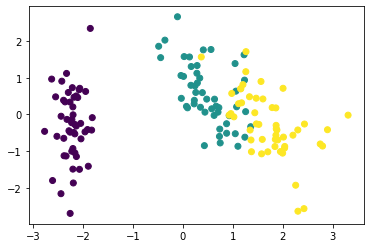

In [15]:
x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

# Part 2 of Questions

## a. What is PCA?
Principal componetnt analysis is unsupervised method used mainly for dimentionalily reduction. This reduction do by capturing the maximum variablility of data and then projects it onto a new subspace with equal or fewer dimensions than the original one.




## b. How can we use PCA for dimensionality reduction and visualize the classes?

PCA is essentially the rotation of coordinate axes , chosen such that each successful axis captures or preserves as much variance as possible. Here we don't consider class labels when we use PCA. But we can viusalize classes using a plot because we can use lower dimention such as 2d or d3 to vusialize high dimentional dataset.

## c. Why do we need to normalize data before feeding it to any machine learning

When we are dealing with datasets there are different features in a particular dataset. Range of values in these features are different from each other. One feature can be payement money while other feature can be age of employ. In order to avoid this huge gap between values in features we mostly perform column normalization by scaling the data. So further problem won't occur in computation and interpretability

# Part 3 - Apply PCA to Breast cancer dataset
## Reduce the dimensionality into 2 features.


In [16]:
df = pd.read_csv('datafile.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
#replace ? mark  with 0
df = df.replace(["?"],0)
#check whether it's removed
df[df.eq("?").any(1)]

,0,1,2,3,4,5,6,7,8,9,10


In [18]:
# drop id column
df.drop([0],axis=1,inplace = True)
# replace class column 10 th column 2, 4 value with -1 and, +1
df[10] = df[10].map({2:-1,4:+1})

In [19]:
X = df[:].drop(10,axis=1).to_numpy(dtype='int')
print(X)
print(X.shape)
Y = df[:].pop(10).to_numpy(dtype='int')
print(Y)
print(Y.shape)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]
(699, 9)
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1
 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1
 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1
  1 -1  1  1  1 -1  1 -1  1  1 -

In [20]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(X)
pca = convers_pca(no_of_components=2)
pca.fit(transformed)
X_std = pca.transform(transformed)

## Visualize the data to check whether it helps to distinguish between a patient who has breast cancer or
not.

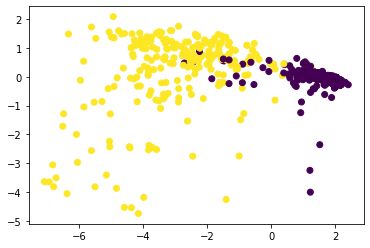

In [21]:
plt.figure()
plt.scatter(X_std[:, 0], X_std[:, 1], c=Y)

## Conclusion

I can see a seperation of two classes as two clusters but there are overlapping instances that cannot clealy seperate breast cancer or not breast cancer patients. 
